In [41]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
try:
    import seaborn
except ImportError:
    pass

---

## Տնային աշխատանք 2

Սա երկրորդ տնային աշխատանքն է։ Տնային աշխատանքը բաղկացած է լինելու վարժություններից, որոնք հնարավոր է անել օգտագործելով լեկցիայում ներկայացված նյութերը, սակայն չի բացառվում այլ հրամանների օգտագործումը նույնպես։ 

Տնային աշխատանքը կատարելու կանոններ. 

1. Աշխատանքը պետք է կատարել ինքնուրույն, քննարկել տնայինը կարելի է, սակայն արտագրել՝ ոչ։ 
2. Այս տնայինի հանձնելու վերջնաժամկետը՝ հինգշաբթի ($1.04.2021$) մինչև կեսգիշեր, ուշ ուղարկված տնայինները **չեն ընդունվելու**։
3. Յուրաքանչյուր վարժությունը կատարելիս բացատրությունները պարտադիր են։
4. Արտագրելու դեպքում ստացված գնահատականը կբաժանվի արտոգրողների (ներառյալ ումից որ արտագրել են) միջև։ 
5. Տնայինը պետք է բաղկացած լինի .ipynb ֆայլից, որի անվանումը պետք է ներառի ձեր անուն ազգանունը և տնայինի համարը։ 

Բոլոր վարժություններում պետք է օգտվել լեկցիայի ժամանակ ստեղծված և օգտագործված տվյալները (եթե նոր տվյալների բազա առաջարկված չէ)։ 

## Վարժությունների ցանկ 1

Այս վարժությունները հիմնված են սրա վրա [PyCon tutorial of Brandon Rhodes](https://github.com/brandon-rhodes/pycon-pandas-tutorial/)։ Տվյալները կարելի է բեռնել այստեղից. [`titles.csv`](https://drive.google.com/open?id=0B3G70MlBnCgKajNMa1pfSzN6Q3M) և [`cast.csv`](https://drive.google.com/open?id=0B3G70MlBnCgKal9UYTJSR2ZhSW8)։


**Չմոռանաք տվյալները պահպանել `data`-ի մեջ։**

In [42]:
cast = pd.read_csv('cast.csv')
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


In [43]:
titles = pd.read_csv('titles.csv')
titles.head()

,title,year
0,The Rising Son,1990
1,Ashes of Kukulcan,2016
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,The 86,2015


<div class="alert alert-success">
    <b>EXERCISE</b>: Կառուցել աղյուսակ, որը ինդեքսավորված կլինի ըստ տարիների և կպարունակի դերասան և դերասանուհիների քանակները (առանձին սյուներում)։
</div>

In [44]:
cast['x']=1
cast

#Մի քիչ հետո պարզ կլինի՝ ինչու եմ այսպես անում:

,title,year,name,type,character,n,x
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0,1
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN,1
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0,1
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0,1
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN,1
...,...,...,...,...,...,...,...
3333690,Stuttur Frakki,1993,Sveinbj?rg ??rhallsd?ttir,actress,Flugfreyja,24.0,1
3333691,Foxtrot,1988,Lilja ??risd?ttir,actress,D?ra,24.0,1
3333692,Niceland (Population. 1.000.002),2004,Sigr??ur J?na ??risd?ttir,actress,Woman in Bus,26.0,1
3333693,U.S.S.S.S...,2003,Krist?n Andrea ??r?ard?ttir,actress,Afgr.dama ? bens?nst??,17.0,1


In [45]:
a=cast.pivot_table(index='year', columns='type', values='x', aggfunc='count')
a

#actor, actress սյուներով pivot_table ստեղծեցի, որի արժեքները ինդեքսում նշված տարիների դերասան/դերասանուհիների քանակներն են (այն ինչ և պետք էր ստանալ):
# cast-ին սկզբում x սյունը ավելացրել էի հենց սրա համար, որ values-ին տալով 'x'-ը՝ կարողանամ քանակը հաշվել: Միգուցե ուրիշ եղանակ էլ կա, բայց սա էլ տարբերակ է...

type,actor,actress
year,,
1894,2.0,1.0
1900,2.0,NaN
1905,1.0,NaN
1906,14.0,3.0
1907,5.0,NaN
...,...,...
2017,1499.0,874.0
2018,209.0,143.0
2019,47.0,26.0




---



<div class="alert alert-success">
    <b>EXERCISE</b>: Ստացված աղյուսակը ներկայացնել գրաֆիկի տեսքով, որտեղ աբսցիսների առանցքով կլինեն տարիները, իսկ օրդինատների առանցքով՝ քանակը (առանձին դերասան, առանձին դերասանուհի -ների համար)։ 
    <b>Հուշում</b>. pivot_table ֆունկցիան ունի .plot() մեթոդը։
</div>

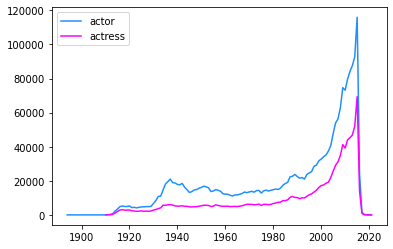

In [46]:
plt.plot(a.index, a['actor'], label='actor', color='dodgerblue')
plt.plot(a.index, a['actress'], label='actress', color='magenta')
plt.legend()



---



<div class="alert alert-success">
    <b>EXERCISE</b>: Գտնել այն տարիները և նրանց քանակը, երբ 'Superman' դերը (character) ավելի շատ է բեմադրվել, քան 'Batman' դերը։
</div>

In [47]:
cast1=cast[cast['character'].isin(['Superman', 'Batman'])]  #cast1-ին վերագրեցի cast-ի այն տվյալները, որոնցում character-ը Superman կամ Batman է:
cast1

,title,year,name,type,character,n,x
926,Batman Fights Dracula,1967,Jing Abalos,actor,Batman,1.0,1
14683,Batman v Superman: Dawn of Justice,2016,Ben Affleck,actor,Batman,NaN,1
14709,Justice League Part Two,2019,Ben Affleck,actor,Batman,NaN,1
14725,Suicide Squad,2016,Ben Affleck,actor,Batman,NaN,1
14731,The Justice League Part One,2017,Ben Affleck,actor,Batman,NaN,1
...,...,...,...,...,...,...,...
2193903,Batman,1943,Lewis Wilson,actor,Batman,1.0,1
2199602,The Cannonball Run,1981,Alfie Wise,actor,Batman,28.0,1
2206616,97 goo waak jai: Jin mo bat sing,1997,Ronald Wong,actor,Superman,NaN,1
2209002,"Fight! Batman, Fight!",1973,Victor (II) Wood,actor,Batman,1.0,1


In [48]:
b=cast1.pivot_table(index='year', columns='character', values='x', aggfunc='count')
b
#    b-ն լինելու է տարիներով ինդեքսավորված, 'Batman','Superman' սյուներ պարունակող pivot_table,
#    որի արժեքները Batman-ի	և Superman-ի` տվյալ տարում խաղացած դերերի քանակներն են առանձին՝ ըստ հմպտ. սյուների:
#    Համոզվելու համար տպեմ b-ն:

character,Batman,Superman
year,,
1938,1.0,NaN
1940,1.0,NaN
1943,1.0,NaN
1948,NaN,1.0
1949,2.0,NaN
1950,NaN,1.0
1951,NaN,2.0
1953,2.0,NaN
1954,NaN,5.0


In [49]:
print(b[b['Superman']>b['Batman']], "\n\n")
print(b[b['Batman'].isnull()], "\n\n")
Len=len(b[b['Superman']>b['Batman']])+len(b[b['Batman']%1!=0])
print("Այն տարիների քանակը, երբ Superman-ը ավելի շատ է նկարվել, քան Batman-ը, ", Len, " է:")

character  Batman  Superman
year                       
1973          1.0       2.0
2010          1.0       2.0 


character  Batman  Superman
year                       
1948          NaN       1.0
1950          NaN       1.0
1951          NaN       2.0
1954          NaN       5.0
1955          NaN       1.0
1978          NaN       2.0
1980          NaN       2.0
1983          NaN       2.0
1987          NaN       1.0
2006          NaN       1.0 


Այն տարիների քանակը, երբ Superman-ը ավելի շատ է նկարվել, քան Batman-ը,  12  է:


Հաշվել եմ նաև այն տարիները, երբ **Batman**-ի դերը չի նկարահանվել (նկարահանվել է 0 հատ՝ NaN): Եվ քանի որ b աղյուսակում **Superman**-ը և **Batman**-ը-ը միաժամանակ NaN լինել չեն կարող, ապա **Superman**-ի սյան ցանկացած արժեքի դեպքում այն մեծ կլինի **Batman**-ի սյունի ընդունած արժեքներից (NaN):

`Օր`. 1980թ.-ին **Superman**-ը նկարահանվել է 2 անգամ, **Batman**-ը՝ 0: Ի նկատի ունեմ, որ սա ևս պահանջին բավարարում է, քանի որ `2>0`:

In [50]:
# Վերջում cast-ը բերեմ նախնական տեսքին.
del(cast['x'])